# Set Up

Mount google drive, ignore if not using Google Collab:

In [1]:
from google.colab import drive

# mount google drive
drive.mount('/content/drive')
%cd /content/drive/My Drive
!git clone https://github.com/FranciscoLozCoding/cooling_with_code.git
%cd cooling_with_code
!git pull

Mounted at /content/drive
/content/drive/My Drive
fatal: destination path 'cooling_with_code' already exists and is not an empty directory.
/content/drive/My Drive/cooling_with_code
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 85.29 KiB | 148.00 KiB/s, done.
From https://github.com/FranciscoLozCoding/cooling_with_code
   2df48f3..c85449b  main       -> origin/main
Updating 2df48f3..c85449b
Fast-forward
 03_simple_model_development.ipynb | 229 +++++++++++++++++++++++++++++-----------------------------
 1 file changed, 115 insertions(+), 114 deletions(-)
fatal: cannot exec '.git/hooks/post-merge': Permission denied


Import libraries

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#data science
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import datasets

In [3]:
#load in traning dataset
fiftym_train = pd.read_csv('data/train/50m_buffer_dataset.csv')
hunm_train = pd.read_csv('data/train/100m_buffer_dataset.csv')
hunfifty_train = pd.read_csv('data/train/150m_buffer_dataset.csv')

# Helper Functions

In [4]:
def conduct_correlation_analysis(df, dataset_name):
    """
    This function conducts a correlation analysis on the DataFrame passed in.

    Args:
        df (pandas.DataFrame): The DataFrame to analyze.
        dataset_name (str): The name of the dataset.

    Returns:
        corr (pandas.DataFrame): The correlation matrix.
        plt (matplotlib.pyplot): The heatmap of the correlation matrix.
    """
    # Compute the correlation matrix.
    corr = df.corr()

    # Create a figure and axis.
    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    # Visualize the correlation matrix using a heatmap.
    sns.heatmap(corr, cmap='coolwarm', ax=ax)

    # Set the title for the heatmap.
    ax.set_title(f'{dataset_name} Correlation')

    # Adjust layout
    plt.tight_layout()

    return corr, plt

# Exploratory Data Analysis

This notebook is for doing a Exploratory Data Analysis on our datasets. For details on the train/test dataset refer to our past notebooks:
- [01_dataset_generation](/01_dataset_generation.ipynb)
- [02_more_dataset_generation](/02_more_dataset_generation.ipynb)

## Correlation Analysis

First, we will conduct a correlation analysis for each of our datasets.

### 50m Buffer Dataset

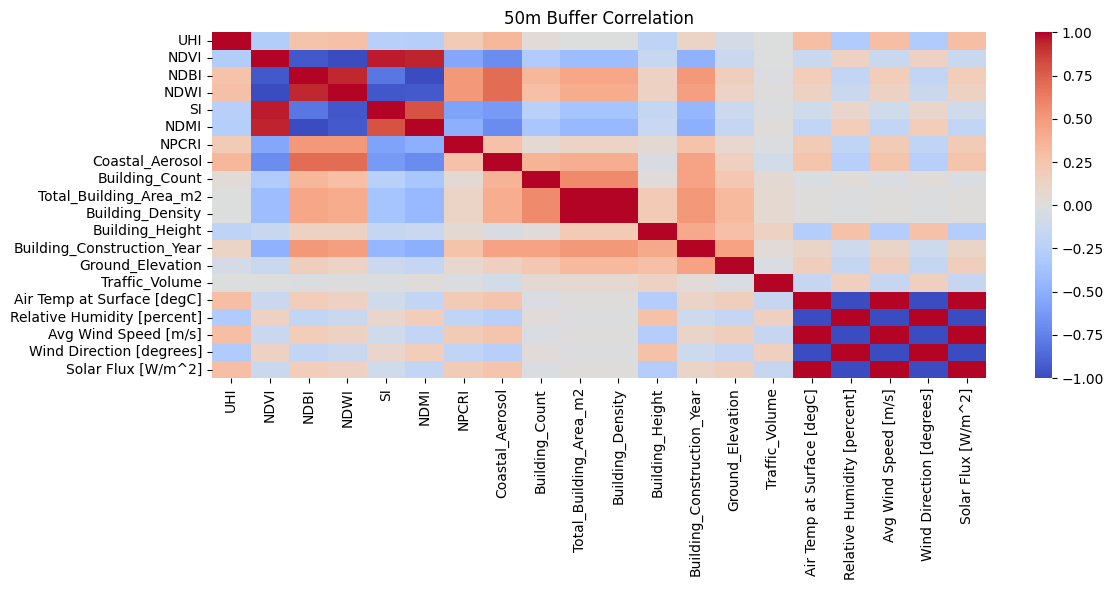

In [5]:
#conduct correlation analysis
corr, plt = conduct_correlation_analysis(fiftym_train, '50m Buffer')
plt.show()

Here we can see that the indices generated from the satellite images are very correlated with each other. The building measurements are also correlated with eachother. Finally the weather measurements are also correlated with eachother. The target variable (UHI) is mostly correlated with all the indices.

### 100m Buffer Dataset

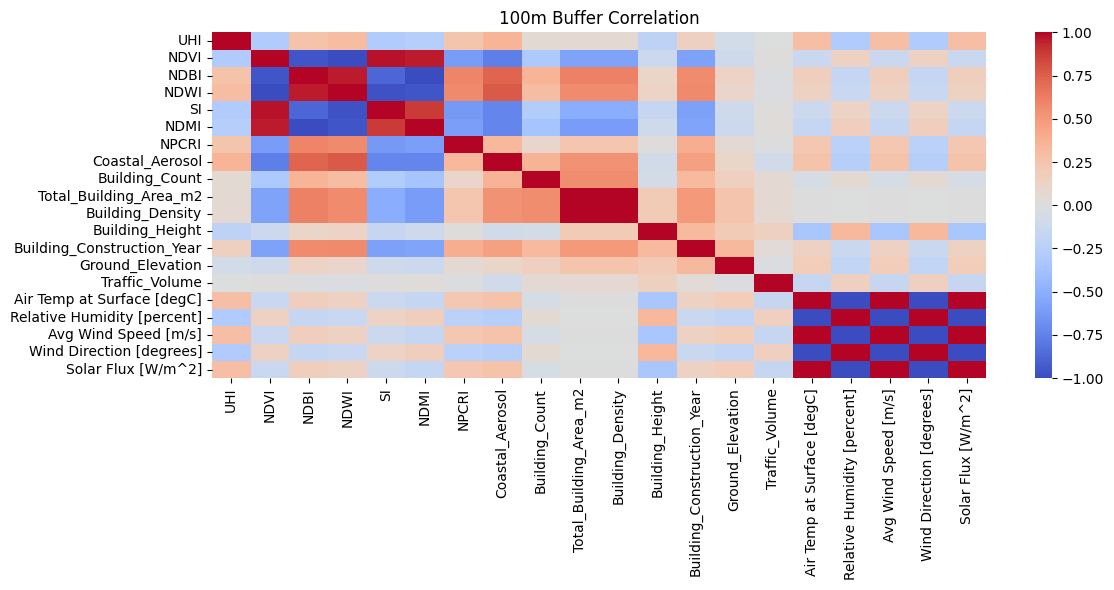

In [6]:
#conduct correlation analysis
corr, plt = conduct_correlation_analysis(hunm_train, '100m Buffer')
plt.show()

### 150m Buffer Dataset

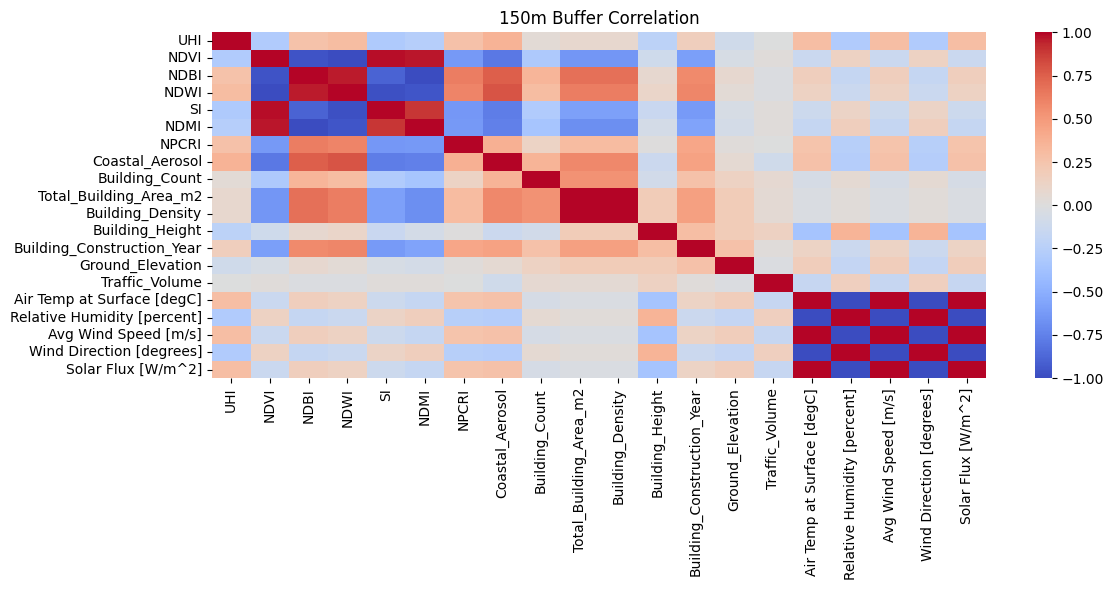

In [7]:
#conduct correlation analysis
corr, plt = conduct_correlation_analysis(hunfifty_train, '150m Buffer')
plt.show()

Increasing the buffer zone does not change the patterns. All three buffer zones have a similiar correlation matrix. Since there is correlation with variables, PCA might help.

## Feature Ranking

## Cluster Analysis

## Distribution Analysis

>TODO: check when you train/valid split the dataset if the distribution is kept in UHI

## Sample Generation Analysis

>TODO: What is a better name for this? In this section, I am trying to figure out if generating data is needed

## Other?

>TODO: think of other analysis to do

## Dataset Selection

Finally, we will do an analysis to see which dataset will give us the best results.

>Note: Do this last!!